In [36]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [37]:
class BMIState(TypedDict):

    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [38]:
def calculate_bmi(state:BMIState)->BMIState:
    bmi=state['weight_kg']/(state['height_m']**2)
    state['bmi']=round(bmi,2)
    return state

In [39]:
def verdict(state:BMIState)->BMIState:
    if state["bmi"]<18.5:
        state["category"]="Underweight"
    elif 18.5<=state["bmi"]<=24.9:
        state["category"]="Normal"
    elif 25<=state["bmi"]<=29.9:
        state["category"]="Overweight"
    else:
        state["category"]="Obese"
    
    return state

In [40]:
graph=StateGraph(BMIState)

In [41]:
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('verdict',verdict)

In [42]:
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','verdict')
graph.add_edge('verdict',END)

In [43]:
workflow=graph.compile()

In [44]:
intial_state={'weight_kg':80.4,'height_m':1.73}
final_state=workflow.invoke(intial_state)
print(final_state)

{'weight_kg': 80.4, 'height_m': 1.73, 'bmi': 26.86, 'category': 'Overweight'}


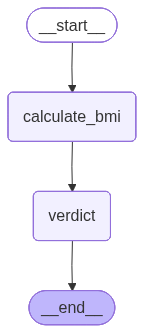

In [46]:
workflow